## 安装biopython
- 安装命令：conda install biopython -c bioconda
- 测试：import Bio

In [1]:
from Bio.Seq import Seq
my_seq=Seq('AGTACACTGGT')
print(my_seq)
type(my_seq)

AGTACACTGGT


Bio.Seq.Seq

In [5]:
print(my_seq.complement())
print(my_seq.reverse_complement())
# 序列切片
my_seq[::-1]

TCATGTGACCA
ACCAGTGTACT


Seq('TGGTCACATGA')

In [6]:
print(my_seq.alphabet)

Alphabet()


In [3]:
from Bio.Alphabet import IUPAC
my_dna=Seq('AGTACACTGGTC',IUPAC.unambiguous_dna)
print(my_dna.alphabet)
print(IUPAC.unambiguous_dna)
dir(IUPAC)

IUPACUnambiguousDNA()
IUPACUnambiguousDNA()


['Alphabet',
 'ExtendedIUPACDNA',
 'ExtendedIUPACProtein',
 'IUPACAmbiguousDNA',
 'IUPACAmbiguousRNA',
 'IUPACData',
 'IUPACProtein',
 'IUPACUnambiguousDNA',
 'IUPACUnambiguousRNA',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ambiguous_dna',
 'ambiguous_rna',
 'extended_dna',
 'extended_protein',
 'protein',
 'unambiguous_dna',
 'unambiguous_rna']

In [6]:
my_rna=my_dna.transcribe()
print(my_dna)
print("just change T --> U : ", my_rna)

realBioRNA=my_dna.reverse_complement().transcribe()
print("real transcrite RNA is :", realBioRNA)

AGTACACTGGTC
just change T --> U :  AGUACACUGGUC
real transcrite RNA is : GACCAGUGUACU


In [15]:
my_cdna=my_rna.back_transcribe()
print(my_cdna)

AGTACACTGGTC


In [16]:
my_protein=my_rna.translate()
print(my_protein)

STLV


The translation tables available in Biopython are based on: [The Genetic Codes](https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi)

In [11]:
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
print(coding_dna.translate())
print(coding_dna.translate(to_stop=True))
print(coding_dna.translate().split("*")[:-1])
print(coding_dna.translate(table="Vertebrate Mitochondrial"))

MAIVMGR*KGAR*
MAIVMGR
[Seq('MAIVMGR', HasStopCodon(IUPACProtein(), '*')), Seq('KGAR', HasStopCodon(IUPACProtein(), '*'))]
MAIVMGRWKGAR*


In [15]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_name["Standard"]
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(standard_table)
print(mito_table)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [14]:
from Bio.Alphabet import generic_dna
gene = Seq("GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA" + \
            "GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT" + \
            "AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT" + \
            "TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT" + \
            "AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA",
            generic_dna)
print(gene.translate(table="Bacterial"))

#In the bacterial genetic code GTG is a valid start codon, 
#and while it does normally encode Valine, 
#if used as a start codon it should be translated as methionine.
print(gene.translate(table="Bacterial", cds=True))

VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR*
MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR


### SeqIO, SeqRecord objects

In [17]:
from Bio import SeqIO

#统计reads的数目
count = 0
for rec in SeqIO.parse("./SRR020192.fastq", "fastq"):
    count += 1
print("%i reads" % count)

41892 reads


In [18]:
print(type(rec))
print(rec)

<class 'Bio.SeqRecord.SeqRecord'>
ID: SRR020192.41892
Name: SRR020192.41892
Description: SRR020192.41892 E3XIUVN03DARAJ/2
Number of features: 0
Per letter annotation for: phred_quality
Seq('GACGACGGTGTTTACATCGTTCCACCACTCATCTCTTCTGTCATGCCAAGAGTC...CAT', SingleLetterAlphabet())


In [20]:
print(repr(rec.seq))
print(rec.letter_annotations)

Seq('GACGACGGTGTTTACATCGTTCCACCACTCATCTCTTCTGTCATGCCAAGAGTC...CAT', SingleLetterAlphabet())
{'phred_quality': [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 37, 37, 37, 37, 38, 34, 24, 24, 24, 26, 26, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38]}


### fastq file QC

In [23]:
#过滤PHRED质量不小于20
good_reads = (rec for rec in \
              SeqIO.parse("./SRR020192.fastq", "fastq") \
              if min(rec.letter_annotations["phred_quality"]) >= 20)
SeqIO.write(good_reads, "./good_quality.fastq", "fastq")

20050

In [ ]:
import matplotlib.pyplot as plt
sizesRaw = [len(rec) for rec in SeqIO.parse("./SRR020192.fastq", "fastq")]
sizesGood = [len(rec) for rec in SeqIO.parse("./good_quality.fastq", "fastq")]

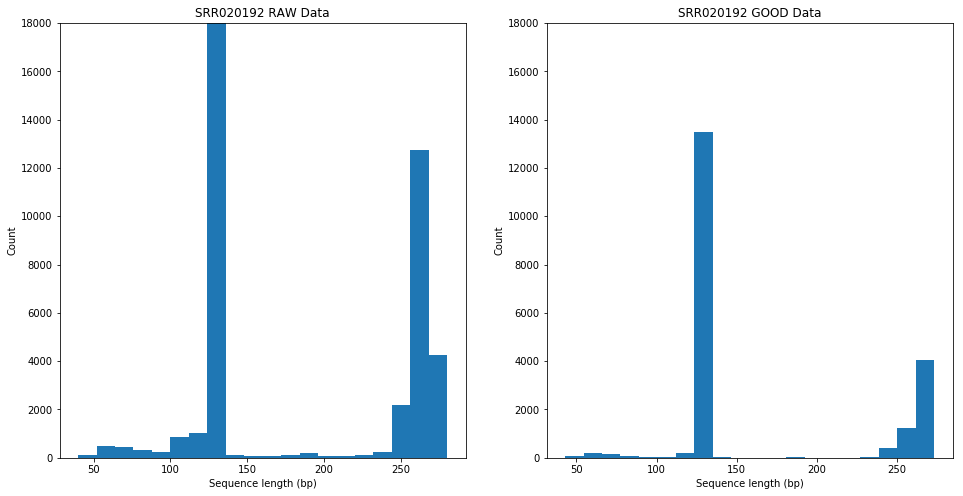

In [63]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = (16.0, 8.0)
ax[0].hist(sizesRaw, bins=20)
ax[0].set(ylim=[0,18000],xlabel="Sequence length (bp)", ylabel="Count",title='SRR020192 RAW Data')

ax[1].hist(sizesGood, bins=20)
ax[1].set(ylim=[0,18000], xlabel="Sequence length (bp)", ylabel="Count",title='SRR020192 GOOD Data')
plt.show()

In [32]:
from Bio import SeqIO
def trim_primers(records, primer):
    """Removes perfect primer sequences at start of reads.

    This is a generator function, the records argument should
    be a list or iterator returning SeqRecord objects.
    """
    len_primer = len(primer) #cache this for later
    for record in records:
        if record.seq.startswith(primer):
            yield record[len_primer:]
        else:
            yield record

original_reads = SeqIO.parse("./fasta/SRR020192.fastq", "fastq")
trimmed_reads = trim_primers(original_reads, "GATGACGGTGT")
print(type(trimmed_reads))
count = SeqIO.write(trimmed_reads, "./fasta/trimmed.fastq", "fastq")
print("Saved %i reads" % count)

<class 'generator'>
Saved 41892 reads


In [64]:
import matplotlib.pyplot as plt
sizesTrim = [len(rec) for rec in SeqIO.parse("./fasta/trimmed.fastq", "fastq")]

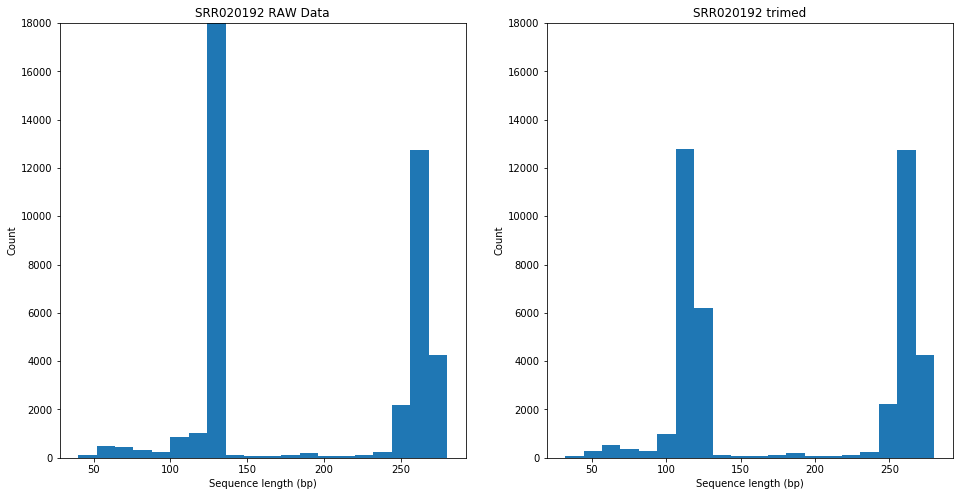

In [65]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = (16.0, 8.0)
ax[0].hist(sizesRaw, bins=20)
ax[0].set(ylim=[0,18000],xlabel="Sequence length (bp)", ylabel="Count",title='SRR020192 RAW Data')

ax[1].hist(sizesTrim, bins=20)
ax[1].set(ylim=[0,18000], xlabel="Sequence length (bp)", ylabel="Count",title='SRR020192 trimed')
plt.show()

In [ ]:
from Bio import SeqIO

def trim_adaptors(records, adaptor, min_len):
    """Trims perfect adaptor sequences, checks read length.

    This is a generator function, the records argument should
    be a list or iterator returning SeqRecord objects.
    """
    len_adaptor = len(adaptor) #cache this for later
    for record in records:
        len_record = len(record) #cache this for later
        if len(record) < min_len:
           #Too short to keep
           continue
        index = record.seq.find(adaptor)
        if index == -1:
            #adaptor not found, so won't trim
            yield record
        elif len_record - index - len_adaptor >= min_len:
            #after trimming this will still be long enough
            yield record[index+len_adaptor:]

original_reads = SeqIO.parse("./fasta/SRR020192.fastq", "fastq")
trimmed_reads = trim_adaptors(original_reads, "GATGACGGTGT", 100)
count = SeqIO.write(trimmed_reads, "./fasta/trimmed.fastq", "fastq")
print("Saved %i reads" % count)

In [ ]:
import matplotlib.pyplot as plt
sizes = [len(rec) for rec in SeqIO.parse("./fasta/trimmed.fastq", "fastq")]
fig, ax = plt.subplots()
ax.hist(sizes, bins=20)
ax.set(xlabel="Sequence length (bp)", ylabel="Count",title='SRR020192 trimed')
plt.show()

In [34]:
import numpy as np

recs=[]
for rec in SeqIO.parse("./fasta/trimmed.fastq", "fastq"):
    index=np.array(rec.letter_annotations["phred_quality"]) >= 20
    rec.letter_annotations={}
#    rec.letter_annotations["phred_quality"]=list(np.array(rec.letter_annotations["phred_quality"])[index])
    rec.seq=Seq("".join([rec.seq[i] for i, j in enumerate(index) if j ]))
    recs.append(rec)
SeqIO.write(recs, "./fasta/SRR020192.qc.fa", "fasta")
#SeqIO.write(recs, "./fasta/SRR020192.qc.fq", "fastq")

41892

In [67]:
import matplotlib.pyplot as plt
sizesQc = [len(rec) for rec in SeqIO.parse("./fasta/SRR020192.qc.fa", "fasta")]

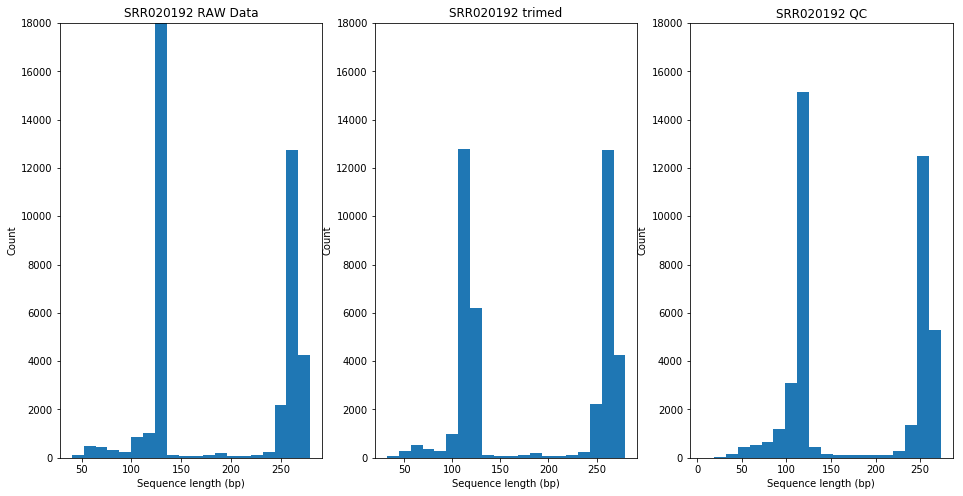

In [69]:
fig, ax = plt.subplots(1,3)
plt.rcParams['figure.figsize'] = (16.0, 8.0)
ax[0].hist(sizesRaw, bins=20)
ax[0].set(ylim=[0,18000],xlabel="Sequence length (bp)", ylabel="Count",title='SRR020192 RAW Data')

ax[1].hist(sizesTrim, bins=20)
ax[1].set(ylim=[0,18000], xlabel="Sequence length (bp)", ylabel="Count",title='SRR020192 trimed')

ax[2].hist(sizesQc, bins=20)
ax[2].set(ylim=[0,18000], xlabel="Sequence length (bp)", ylabel="Count",title='SRR020192 QC')
plt.show()

## PDB

In [12]:
from Bio.PDB import parse_pdb_header

with open("./1hsg.pdb", "r") as handle:
    header_dict = parse_pdb_header(handle)
    header_structure = 
    print(header_dict)

{'name': ' crystal structure at 1.9 angstroms resolution of human immunodeficiency virus (hiv) ii protease complexed with l- 735,524, an orally bioavailable inhibitor of the hiv proteases', 'head': 'hydrolase (acid proteinase)', 'idcode': '1HSG', 'deposition_date': '1995-03-31', 'release_date': '1996-04-03', 'structure_method': 'x-ray diffraction', 'resolution': 2.0, 'structure_reference': [], 'journal_reference': 'z.chen,y.li,e.chen,d.l.hall,p.l.darke,c.culberson, j.a.shafer,l.c.kuo crystal structure at 1.9-a resolution of human immunodeficiency virus (hiv) ii protease complexed with l-735,524, an orally bioavailable inhibitor of the hiv proteases. j.biol.chem. v. 269 26344 1994 issn 0021-9258 7929352 ', 'author': 'Z.Chen', 'compound': {'1': {'misc': '', 'molecule': 'hiv-1 protease', 'chain': 'a, b', 'ec': '3.4.23.-', 'engineered': 'yes', 'other_details': 'ny5 isolate'}}, 'source': {'1': {'misc': '', 'organism_scientific': 'human immunodeficiency virus 1', 'organism_taxid': '11676', '

In [13]:
for a,b in header_dict.items():
    print(a,": ",b)

name :   crystal structure at 1.9 angstroms resolution of human immunodeficiency virus (hiv) ii protease complexed with l- 735,524, an orally bioavailable inhibitor of the hiv proteases
head :  hydrolase (acid proteinase)
idcode :  1HSG
deposition_date :  1995-03-31
release_date :  1996-04-03
structure_method :  x-ray diffraction
resolution :  2.0
structure_reference :  []
journal_reference :  z.chen,y.li,e.chen,d.l.hall,p.l.darke,c.culberson, j.a.shafer,l.c.kuo crystal structure at 1.9-a resolution of human immunodeficiency virus (hiv) ii protease complexed with l-735,524, an orally bioavailable inhibitor of the hiv proteases. j.biol.chem. v. 269 26344 1994 issn 0021-9258 7929352 
author :  Z.Chen
compound :  {'1': {'misc': '', 'molecule': 'hiv-1 protease', 'chain': 'a, b', 'ec': '3.4.23.-', 'engineered': 'yes', 'other_details': 'ny5 isolate'}}
source :  {'1': {'misc': '', 'organism_scientific': 'human immunodeficiency virus 1', 'organism_taxid': '11676', 'gene': 'hiv-1 protease from 

### SMCRA (Structure/Model/Chain/Residue/Atom) architecture:

    A structure consists of models
    A model consists of chains
    A chain consists of residues
    A residue consists of atoms 



In [26]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser(PERMISSIVE=1)
structure = parser.get_structure(file="1hsg.pdb", id="1hsg")
structure.get_full_id()

/opt/conda/envs/bio/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1924.
  PDBConstructionWarning)
/opt/conda/envs/bio/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1968.
  PDBConstructionWarning)


('1hsg',)

In [102]:
chains = structure.get_chains()
print([chain for chain in chains])

residues = structure.get_residues()
print([res.get_resname() for res in residues])

chains = structure[0]['A']
residues = chains
print([res.get_resname() for res in residues])

[<Chain id=A>, <Chain id=B>]
['PRO', 'GLN', 'ILE', 'THR', 'LEU', 'TRP', 'GLN', 'ARG', 'PRO', 'LEU', 'VAL', 'THR', 'ILE', 'LYS', 'ILE', 'GLY', 'GLY', 'GLN', 'LEU', 'LYS', 'GLU', 'ALA', 'LEU', 'LEU', 'ASP', 'THR', 'GLY', 'ALA', 'ASP', 'ASP', 'THR', 'VAL', 'LEU', 'GLU', 'GLU', 'MET', 'SER', 'LEU', 'PRO', 'GLY', 'ARG', 'TRP', 'LYS', 'PRO', 'LYS', 'MET', 'ILE', 'GLY', 'GLY', 'ILE', 'GLY', 'GLY', 'PHE', 'ILE', 'LYS', 'VAL', 'ARG', 'GLN', 'TYR', 'ASP', 'GLN', 'ILE', 'LEU', 'ILE', 'GLU', 'ILE', 'CYS', 'GLY', 'HIS', 'LYS', 'ALA', 'ILE', 'GLY', 'THR', 'VAL', 'LEU', 'VAL', 'GLY', 'PRO', 'THR', 'PRO', 'VAL', 'ASN', 'ILE', 'ILE', 'GLY', 'ARG', 'ASN', 'LEU', 'LEU', 'THR', 'GLN', 'ILE', 'GLY', 'CYS', 'THR', 'LEU', 'ASN', 'PHE', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH

In [87]:
chainA = structure[0]['A']
chainB = structure[0]['B']
print([res.get_resname() for res in chainA])
print([res.get_resname() for res in chainB])

['PRO', 'GLN', 'ILE', 'THR', 'LEU', 'TRP', 'GLN', 'ARG', 'PRO', 'LEU', 'VAL', 'THR', 'ILE', 'LYS', 'ILE', 'GLY', 'GLY', 'GLN', 'LEU', 'LYS', 'GLU', 'ALA', 'LEU', 'LEU', 'ASP', 'THR', 'GLY', 'ALA', 'ASP', 'ASP', 'THR', 'VAL', 'LEU', 'GLU', 'GLU', 'MET', 'SER', 'LEU', 'PRO', 'GLY', 'ARG', 'TRP', 'LYS', 'PRO', 'LYS', 'MET', 'ILE', 'GLY', 'GLY', 'ILE', 'GLY', 'GLY', 'PHE', 'ILE', 'LYS', 'VAL', 'ARG', 'GLN', 'TYR', 'ASP', 'GLN', 'ILE', 'LEU', 'ILE', 'GLU', 'ILE', 'CYS', 'GLY', 'HIS', 'LYS', 'ALA', 'ILE', 'GLY', 'THR', 'VAL', 'LEU', 'VAL', 'GLY', 'PRO', 'THR', 'PRO', 'VAL', 'ASN', 'ILE', 'ILE', 'GLY', 'ARG', 'ASN', 'LEU', 'LEU', 'THR', 'GLN', 'ILE', 'GLY', 'CYS', 'THR', 'LEU', 'ASN', 'PHE', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH'

In [121]:
ligand = []
for residue in chainB.get_list():
    residue_id = residue.get_id()
    hetfield = residue_id[0]
    if hetfield[0]!="W" and hetfield[0]!=" ":
        print(residue_id)
        ligand.append(residue)

print([atom for atom in ligand[0]])

('H_MK1', 902, ' ')
[<Atom N1>, <Atom C1>, <Atom C2>, <Atom C3>, <Atom O1>, <Atom N2>, <Atom C4>, <Atom C5>, <Atom C6>, <Atom C7>, <Atom N3>, <Atom C8>, <Atom C9>, <Atom C10>, <Atom C11>, <Atom O2>, <Atom C12>, <Atom C13>, <Atom C14>, <Atom C15>, <Atom C16>, <Atom C17>, <Atom C18>, <Atom C19>, <Atom C20>, <Atom C21>, <Atom O3>, <Atom N4>, <Atom C22>, <Atom C23>, <Atom O4>, <Atom C24>, <Atom C25>, <Atom C26>, <Atom C27>, <Atom C28>, <Atom C29>, <Atom C30>, <Atom C31>, <Atom C32>, <Atom C33>, <Atom N5>, <Atom C34>, <Atom C35>, <Atom C36>]


In [126]:
class ligandSelect(Select):
    def accept_residue(self, residue):
        residue_id = residue.get_id()
        hetfield = residue_id[0]
        if hetfield[0]!="W" and hetfield[0]!=" ":
            return 1
        else:
            return 0

io = PDBIO()
io.set_structure(structure)
io.save("ligand.pdb", ligandSelect())

In [128]:
class recptorSelect(Select):
    def accept_residue(self, residue):
        residue_id = residue.get_id()
        hetfield = residue_id[0]
        if hetfield[0] ==" ":
            return 1
        else:
            return 0

io = PDBIO()
io.set_structure(structure)
io.save("recptor.pdb", recptorSelect())

In [67]:
residues1 = chainA[1]
residues2 = chainA[2]
print(residues1.get_resname(), residues2.get_resname())

ca1 = residues1["CA"]
ca2 = residues2["CA"]
print(ca1.get_coord(),ca2.get_coord())

import numpy as np
coord1 = np.array(ca1.get_coord())
coord2 = np.array(ca2.get_coord())
distance = np.linalg.norm(coord1-coord2)
print(distance)

PRO GLN
[30.307 38.663  5.319] [30.158 36.492  2.199]
3.803923


In [75]:
from Bio.PDB import *

distance = ca1 - ca2
print("two ca distance is :", distance)

atoms = [atom.get_vector() for atom in residues1]
print(atoms)

angle = calc_angle(atoms[1], atoms[2], atoms[3])
print("angle is :", angle)

angle = calc_dihedral(atoms[1], atoms[2], atoms[3], atoms[4])
print("dihedral is :", angle)

two ca distance is : 3.803923
[<Vector 29.36, 39.69, 5.86>, <Vector 30.31, 38.66, 5.32>, <Vector 29.76, 38.07, 4.02>, <Vector 28.60, 38.30, 3.68>, <Vector 30.51, 37.54, 6.34>, <Vector 29.30, 37.59, 7.16>, <Vector 28.78, 39.01, 7.02>]
angle is : 2.0978364014833564
dihedral is : -0.7333232671727313


In [138]:
model = structure[0]
atoms = [atom for chain in model 
                 for residue in chain 
                     for atom in residue] 

atoms = np.array(atoms)
atoms - atoms.reshape(len(atoms),1)

array([[0.0, 1.4954257, 2.4805305, ..., 27.113453, 51.407173, 24.251959],
       [1.4954257, 0.0, 1.5270493, ..., 27.685976, 50.43523, 23.083632],
       [2.4805305, 1.5270493, 0.0, ..., 26.69348, 49.640152, 22.004047],
       ...,
       [27.113453, 27.685976, 26.69348, ..., 0.0, 51.458992, 31.606743],
       [51.407173, 50.43523, 49.640152, ..., 51.458992, 0.0, 29.76383],
       [24.251959, 23.083632, 22.004047, ..., 31.606743, 29.76383, 0.0]],
      dtype=object)

In [151]:
atom = np.array(range(1,5))
dMatrix = abs(atom - atom.reshape(4,1))
filterMa = dMatrix >1

Object `kdtrees.KDTree` not found.


In [100]:
# Using C-N
ppb = PPBuilder()
for pp in ppb.build_peptides(structure):
    print(pp.get_sequence())


# Using CA-CA
ppb = CaPPBuilder()
pp = ppb.build_peptides(structure)
seq = pp[0].get_sequence()
print("chainA seq is : ",seq)

PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF
PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF
chainA seq is :  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKMIGGIGGFIKVRQYDQILIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF


In [124]:
from Bio import Seq
type(seq)

Bio.Seq.Seq